#Σακαρέλλος Ιωάννης - sdi1800167

In [ ]:
import numpy as np
import pandas as pd
import math
import os
import os.path
import cv2

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##Ερώτημα 1

In [ ]:
def f(x, w):
  return 1 / (1 + math.exp(-w * x))

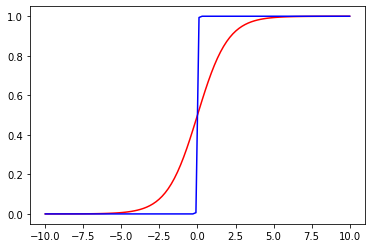

In [ ]:
xlin = np.linspace(-10, 10, 100)
y1 = []
y5 = []
y100 = []

for x in xlin:
  y1.append(f(x, 1))
  y5.append(f(x, 50))
#  y100.append(f(x, 100)) math range error

plt.plot(xlin, y1, color='red')
plt.plot(xlin, y5, color='blue')
#plt.plot(x, y100, color='green')

plt.show()

##Ερώτημα 3

###Ζητούμενο I

In [ ]:
def loadImages(path, set_number):
  id = int(set_number[-1])
  if id == 1:
    valid = [('0' + str(x)) for x in range(1, 8)]
  elif id == 2:
    valid = [('0' + str(x)) for x in range(8, 10)] + [str(x) for x in range(10, 20)]
  elif id == 3:
    valid = [str(x) for x in range(20, 32)]
  elif id == 4:
    valid = [str(x) for x in range(32, 46)]
  elif id == 5:
    valid = [str(x) for x in range(46, 65)]
  faces = pd.DataFrame()
  labels = pd.DataFrame()
  for filename in os.listdir(path):
    if filename[9:11] in valid:
      faces[filename[:-4]] = cv2.imread(path + filename, 0).flatten()
      labels[filename[:-4]] = [int(filename[6:8])]
  return faces, labels

###Ζητούμενο II

In [ ]:
path = r'/content/gdrive/MyDrive/Machine Learning/HW2/faces/faces/'

faces1, labels1 = loadImages(path, 'Set_1')
faces2, labels2 = loadImages(path, 'Set_2')
faces3, labels3 = loadImages(path, 'Set_3')
faces4, labels4 = loadImages(path, 'Set_4')
faces5, labels5 = loadImages(path, 'Set_5')

dataAll = pd.concat([faces1, faces2, faces3, faces4, faces5], axis = 1)

faces1 -= np.mean(faces1, axis = 0)
faces1 /= np.std(faces1, axis = 0)
faces2 -= np.mean(faces2, axis = 0)
faces2 /= np.std(faces2, axis = 0)
faces3 -= np.mean(faces3, axis = 0)
faces3 /= np.std(faces3, axis = 0)
faces4 -= np.mean(faces4, axis = 0)
faces4 /= np.std(faces4, axis = 0)
faces5 -= np.mean(faces5, axis = 0)
faces5 /= np.std(faces5, axis = 0)
dataAll -= np.mean(dataAll, axis = 0)
dataAll /= np.std(dataAll, axis = 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [ ]:
pca9 = PCA(n_components = 9)
pca9.fit(faces1.T)

X_train = pca9.transform(faces1.T)
y_train = labels1.T

X_test2 = pca9.transform(faces2.T)
y_test2 = labels2.T

X_test3 = pca9.transform(faces3.T)
y_test3 = labels3.T

X_test4 = pca9.transform(faces4.T)
y_test4 = labels4.T

X_test5 = pca9.transform(faces5.T)
y_test5 = labels5.T

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

print("KNN score for d=9, Set_1: ", knn.score(X_train, y_train))
print("KNN score for d=9, Set_2: ", knn.score(X_test2, y_test2))
print("KNN score for d=9, Set_3: ", knn.score(X_test3, y_test3))
print("KNN score for d=9, Set_4: ", knn.score(X_test4, y_test4))
print("KNN score for d=9, Set_5: ", knn.score(X_test5, y_test5))

KNN score for d=9, Set_1:  1.0
KNN score for d=9, Set_2:  1.0
KNN score for d=9, Set_3:  0.775
KNN score for d=9, Set_4:  0.3357142857142857
KNN score for d=9, Set_5:  0.14210526315789473


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
pca30 = PCA(n_components = 30)
pca30.fit(faces1.T)

X_train = pca30.transform(faces1.T)
y_train = labels1.T

X_test2 = pca30.transform(faces2.T)
y_test2 = labels2.T

X_test3 = pca30.transform(faces3.T)
y_test3 = labels3.T

X_test4 = pca30.transform(faces4.T)
y_test4 = labels4.T

X_test5 = pca30.transform(faces5.T)
y_test5 = labels5.T

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

print("KNN score for d=30, Set_1: ", knn.score(X_train, y_train))
print("KNN score for d=30, Set_2: ", knn.score(X_test2, y_test2))
print("KNN score for d=30, Set_3: ", knn.score(X_test3, y_test3))
print("KNN score for d=30, Set_4: ", knn.score(X_test4, y_test4))
print("KNN score for d=30, Set_5: ", knn.score(X_test5, y_test5))

KNN score for d=30, Set_1:  1.0
KNN score for d=30, Set_2:  1.0
KNN score for d=30, Set_3:  0.9583333333333334
KNN score for d=30, Set_4:  0.4357142857142857
KNN score for d=30, Set_5:  0.22631578947368422


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


###Ζητούμενο III

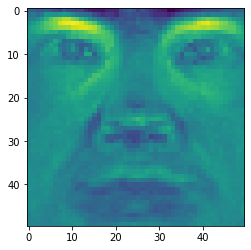

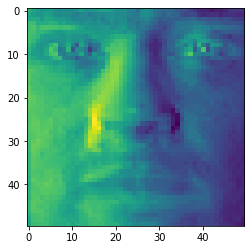

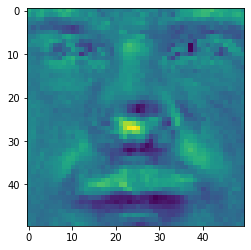

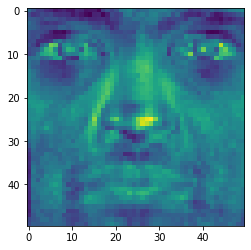

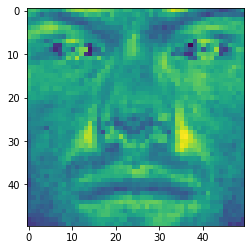

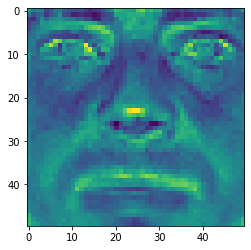

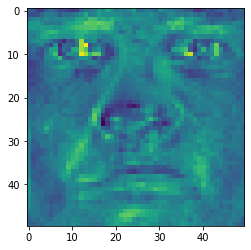

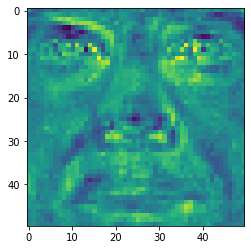

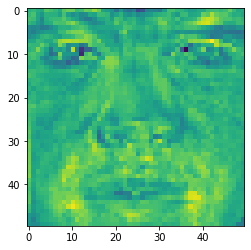

In [ ]:
for img in pca9.components_[0:9]:
  plt.figure()
  plt.imshow(img.reshape((50, 50)))

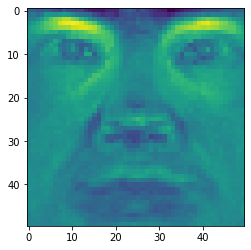

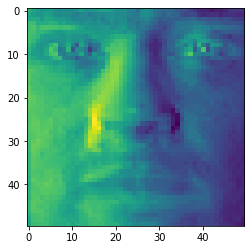

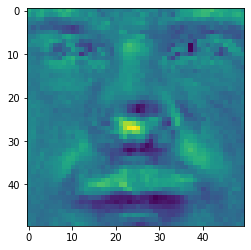

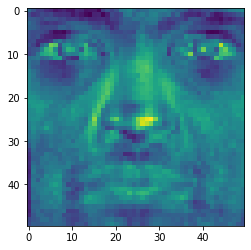

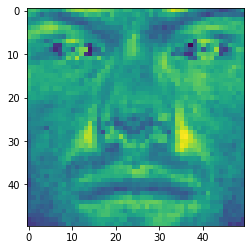

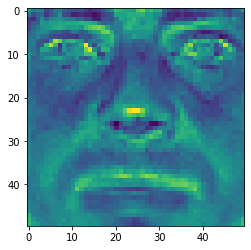

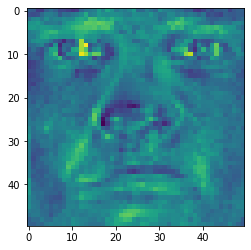

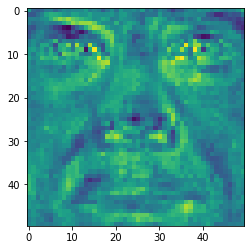

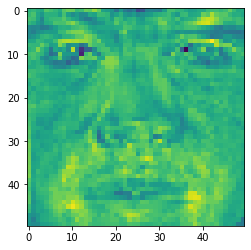

In [ ]:
for img in pca30.components_[0:9]:
  plt.figure()
  plt.imshow(img.reshape((50, 50)))